## This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. 

## In particular, the Cleveland database is the only one that has been used by ML researchers to this date. 

## The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

In [889]:
#Libraries

import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

sns.set_style('whitegrid') #darkgrid

import warnings
import datetime as dt
import matplotlib.dates as mdates

warnings.filterwarnings('ignore')

In [890]:
# loading csv data to dataframe 
heart = pd.read_csv('heart.csv')
# checking out the Data
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


1. age 
2. sex 
3. chest pain type (4 values) 
4. resting blood pressure 
5. serum cholestoral in mg/dl 
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved 
9. exercise induced angina 
10. oldpeak = ST depression induced by exercise relative to rest 
11. the slope of the peak exercise ST segment 
12. number of major vessels (0-3) colored by flourosopy 
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: Heart disease (0 = no, 1 = yes)

age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type
    0: Typical angina: chest pain related decrease blood supply to the heart
    1: Atypical angina: chest pain not related to heart
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    3: Asymptomatic: chest pain not showing signs of disease

trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

chol - serum cholestoral in mg/dl
    serum = LDL + HDL + .2 * triglycerides
    above 200 is cause for concern

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    '>126' mg/dL signals diabetes

restecg - resting electrocardiographic results
    0: Nothing to note
    1: ST-T Wave abnormality 
            can range from mild symptoms to severe problems 
            signals non-normal heart beat
    2: Possible or definite left ventricular hypertrophy
            Enlarged heart's main pumping chamber

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

slope - the slope of the peak exercise ST segment
    0: Upsloping: better heart rate with excercise (uncommon)
    1: Flatsloping: minimal change (typical healthy heart)
    2: Downslopins: signs of unhealthy heart

ca - number of major vessels (0-3) colored by flourosopy
    colored vessel means the doctor can see the blood passing through
    the more blood movement the better (no clots)

thal - thalium stress result
    1,3: normal
    6: fixed defect: used to be defect but ok now
    7: reversable defect: no proper blood movement when excercising

target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## 1.- Exploratory Data Analysis

In [563]:
# Data shape
print('Heart:',heart.shape)

Heart: (303, 14)


In [564]:
#checking columns and total records
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [565]:
# Any missing in Plant 1?
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [566]:
categorical_val = []
continous_val = []
for column in heart.columns:
    print('==============================')
    print(f"{column} : {heart[column].unique()}")
    if len(heart[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

In [567]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

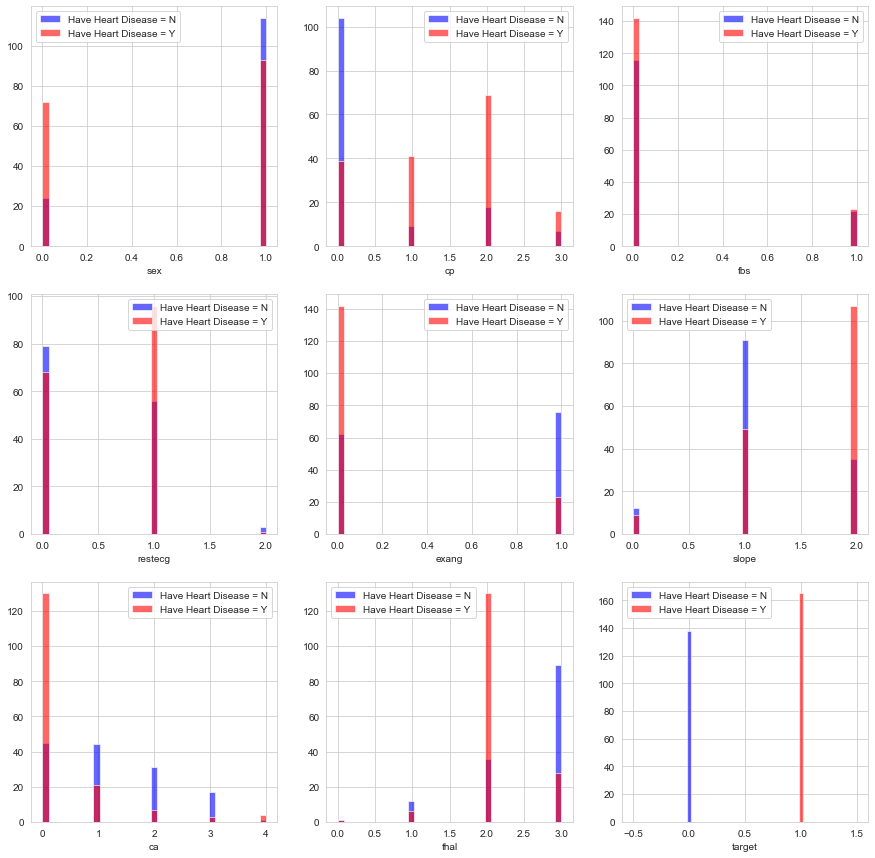

In [568]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    heart[heart["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = N', alpha=0.6)
    heart[heart["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = Y', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

- cp {Chest Pain} : People with cp equl to 1, 2, 3 are more likely to have heart disease than people with cp equal to 0.

- restecg {resting electrocardiographic results} : People with value 1 (signals non-normal heart beat, can range from mild symptoms to severe problems) are more likely to have heart disease.

- exang {exercise induced angina} : People with value 0 (No ==> exercise induced angina) have heart disease more than people with value 1 (Yes ==> exercise induced angina)

- slope {the slope of the peak exercise ST segment} : People with slope value equal to 2 (Downslopins: signs of unhealthy heart) are more likely to have heart disease than people with slope value equal to 0 (Upsloping: better heart rate with excercise) or 1 (Flatsloping: minimal change (typical healthy heart)).

- ca {number of major vessels (0-3) colored by flourosopy} : the more blood movement the better so people with ca equal to 0 are more likely to have heart disease.

- thal {thalium stress result} : People with thal value equal to 2 (fixed defect: used to be defect but ok now) are more likely to have heart disease.

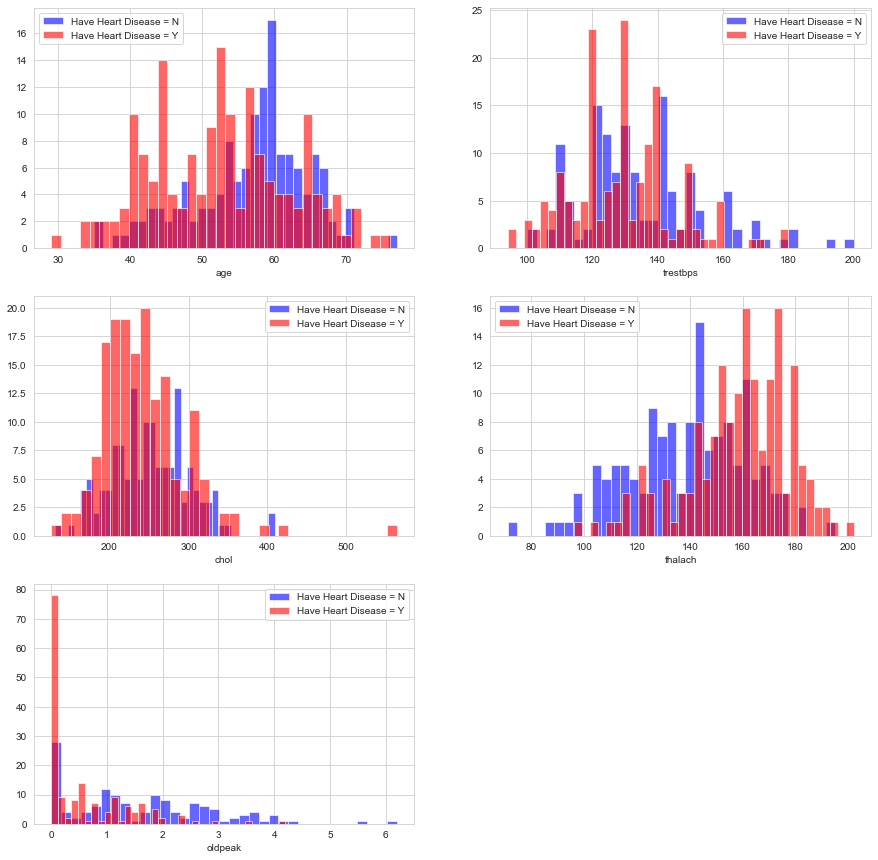

In [569]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    heart[heart["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = N', alpha=0.6)
    heart[heart["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = Y', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

- trestbps : resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

- chol {serum cholestoral in mg/dl} : above 200 is cause for concern.

- thalach {maximum heart rate achieved} : People how acheived a maximum more than 140 are more likely to have heart disease.

- oldpeak ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

In [570]:
heart.target.value_counts()

1    165
0    138
Name: target, dtype: int64

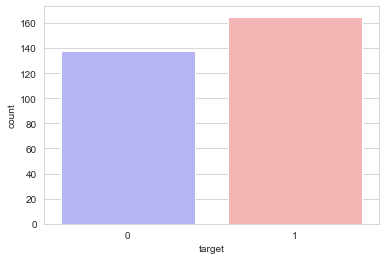

In [571]:
sns.countplot(x="target", data=heart, palette="bwr")
plt.show()

In [572]:
countNoDisease = len(heart[heart.target == 0])
countHaveDisease = len(heart[heart.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(heart.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(heart.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


In [573]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [574]:
#Displaying correlation among all the columns 
heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


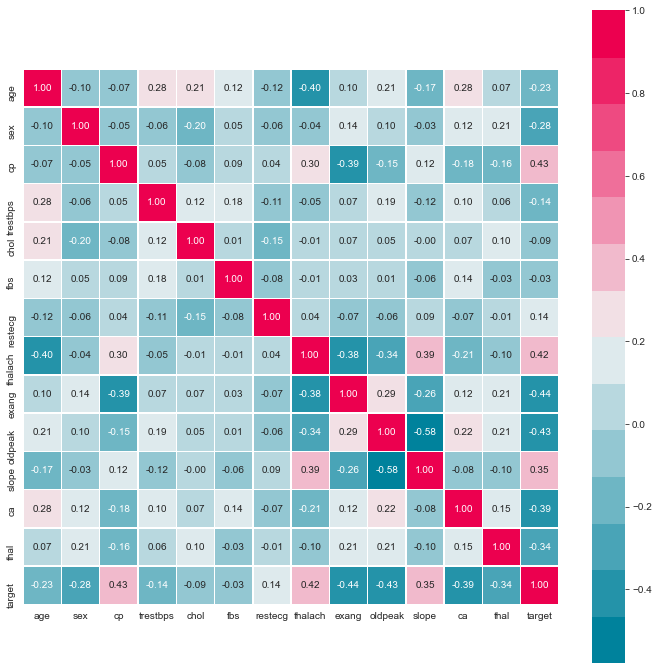

In [575]:
# Heatmap 
plt.figure(figsize=(12,12))
sns.heatmap(heart.corr(),
           cmap=sns.diverging_palette(220, 5, s=100, l=50, n=14),
           linewidths=.5,
           fmt=".2f",
           square=True,
           annot = True);

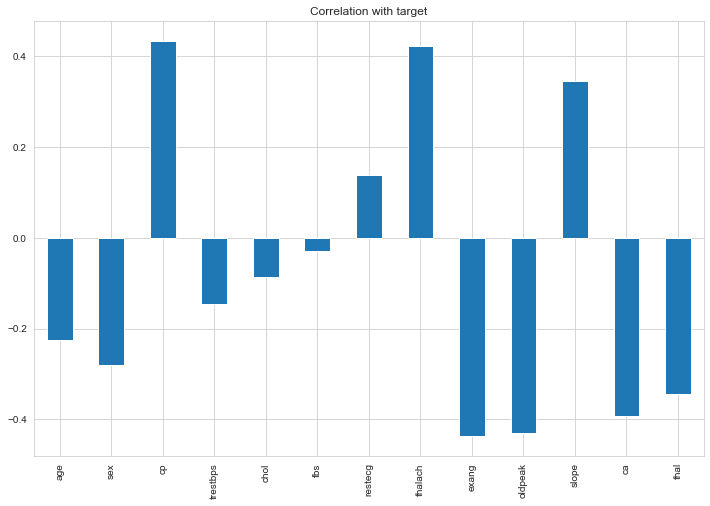

In [576]:
heart.drop('target', axis=1).corrwith(heart.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target");

# 1.1.- Age analysis

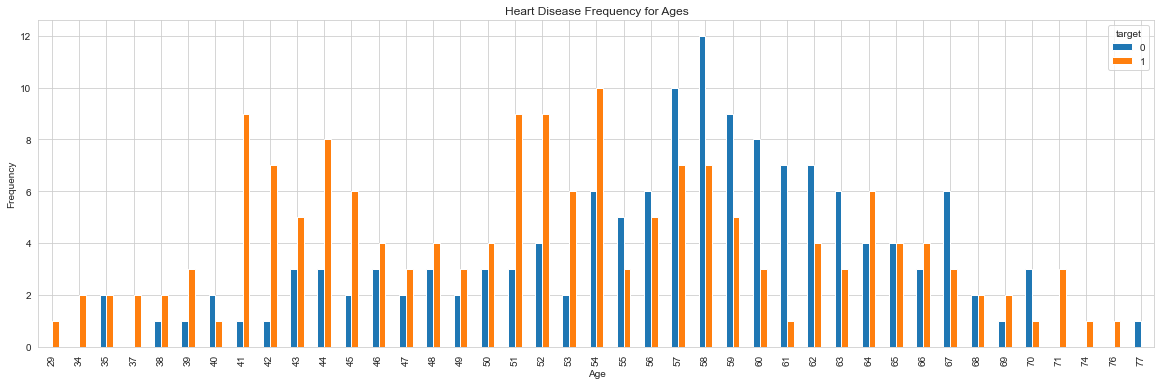

In [577]:
pd.crosstab(heart.age,heart.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

In [578]:
#firstly find min and max ages
minAge=min(heart.age)
maxAge=max(heart.age)
meanAge=heart.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.366336633663366


In [579]:
young_ages=heart[(heart.age>=29)&(heart.age<40)]
middle_ages=heart[(heart.age>=40)&(heart.age<55)]
elderly_ages=heart[(heart.age>55)]
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))

Young Ages : 16
Middle Ages : 128
Elderly Ages : 151


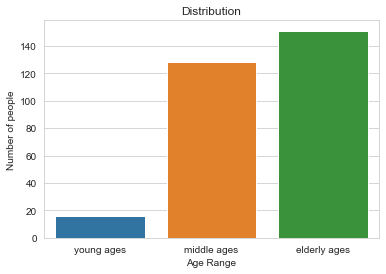

In [580]:
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.xlabel('Age Range')
plt.ylabel('Number of people')
plt.title('Distribution')
plt.show()

In [581]:
heart['AgeRange']=0
youngAge_index=heart[(heart.age>=29)&(heart.age<40)].index
middleAge_index=heart[(heart.age>=40)&(heart.age<55)].index
elderlyAge_index=heart[(heart.age>55)].index

In [582]:
for index in elderlyAge_index:
    heart.loc[index,'AgeRange']=2
    
for index in middleAge_index:
    heart.loc[index,'AgeRange']=1

for index in youngAge_index:
    heart.loc[index,'AgeRange']=0

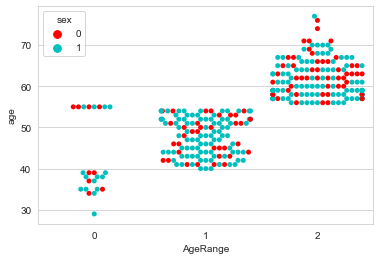

In [583]:
# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="AgeRange", y="age",hue='sex',
              palette=["r", "c", "y"], data=heart)
plt.show()

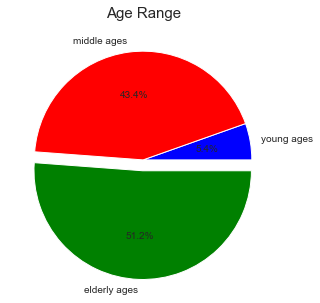

In [584]:
colors = ['blue','red','green']
explode = [0,0,0.1]
plt.figure(figsize = (5,5))
#plt.pie([target_0_agerang_0,target_1_agerang_0], explode=explode, labels=['Target 0 Age Range 0','Target 1 Age Range 0'], colors=colors, autopct='%1.1f%%')
plt.pie([len(young_ages),len(middle_ages),len(elderly_ages)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.title('Age Range',fontsize = 15)
plt.show()

# 1.2.- Gender Analysis

In [585]:
heart.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

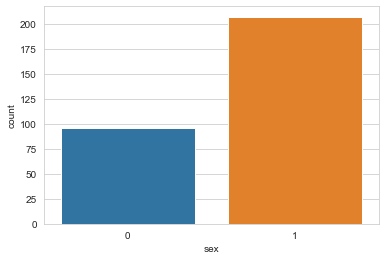

In [586]:
#Sex (1 = male; 0 = female)
sns.countplot(heart.sex)
plt.show()

In [587]:
countFemale = len(heart[heart.sex == 0])
countMale = len(heart[heart.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(heart.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(heart.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


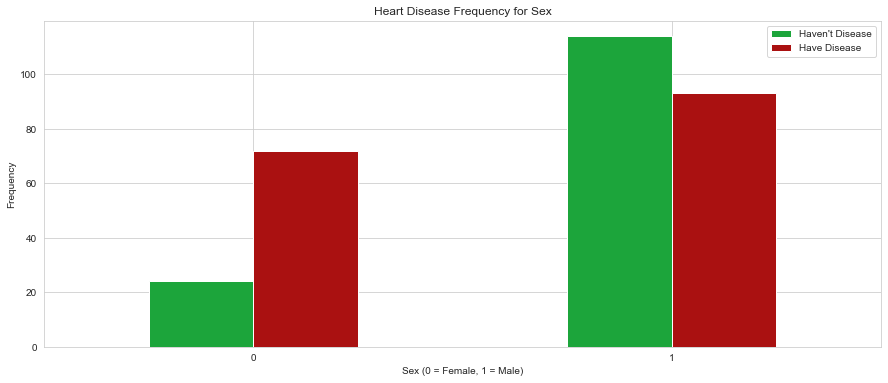

In [588]:
pd.crosstab(heart.sex,heart.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

# 1.3.- Main positive correlation attributes - Analysis

### a) Chest Pain Type Analysis

In [589]:
#As seen, there are 4 types of chest pain.
heart.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

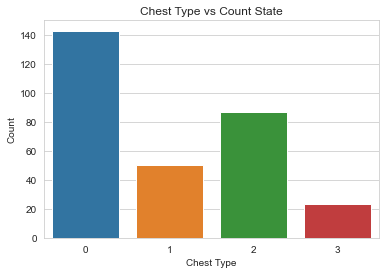

In [590]:
sns.countplot(heart.cp)
plt.xlabel('Chest Type')
plt.ylabel('Count')
plt.title('Chest Type vs Count State')
plt.show()
#0 status at least
#1 condition slightly distressed
#2 condition medium problem
#3 condition too bad

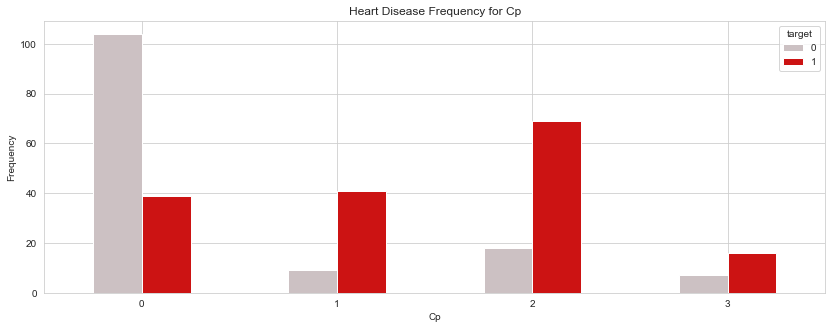

In [591]:
pd.crosstab(heart.cp,heart.target).plot(kind="bar",figsize=(14,5), color=['#CCC1C3','#CC1313'])
plt.title('Heart Disease Frequency for Cp')
plt.xlabel('Cp')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

### b) Thalach Analysis

In [592]:
target=sorted(heart.age.unique())
age_thalach_values=heart.groupby('age')['thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(heart[heart['age']==age].thalach)/age_thalach_values[i])

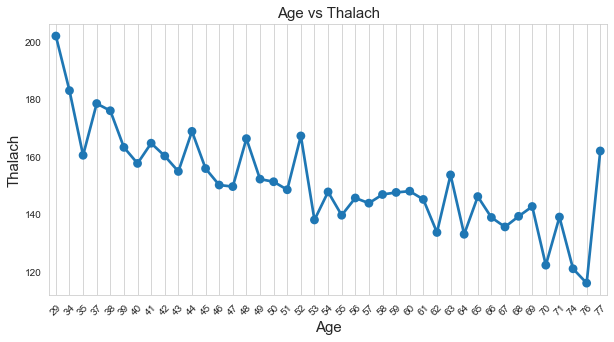

In [593]:
#data_sorted=data.sort_values(by='Age',ascending=True)
plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,alpha=0.8)
plt.xlabel('Age',fontsize = 15)
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15)
plt.title('Age vs Thalach',fontsize = 15)
plt.grid()
plt.show()

In [594]:
age_range_thalach=heart.groupby('AgeRange')['thalach'].mean()

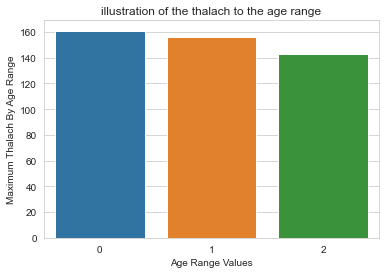

In [595]:
sns.barplot(x=age_range_thalach.index,y=age_range_thalach.values)
plt.xlabel('Age Range Values')
plt.ylabel('Maximum Thalach By Age Range')
plt.title('illustration of the thalach to the age range')
plt.show()
#As shown in this graph, this rate decreases as the heart rate 
#is faster and in old age areas.

In [596]:
cp_thalach=heart.groupby('cp')['thalach'].mean()

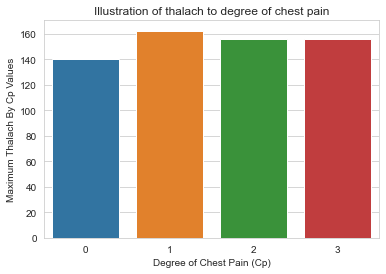

In [597]:
sns.barplot(x=cp_thalach.index,y=cp_thalach.values)
plt.xlabel('Degree of Chest Pain (Cp)')
plt.ylabel('Maximum Thalach By Cp Values')
plt.title('Illustration of thalach to degree of chest pain')
plt.show()
#As seen in this graph, it is seen that the heart rate is less 
#when the chest pain is low. But in cases where chest pain is 
#1, it is observed that the area is more. 2 and 3 were found to 
#be of the same degree.

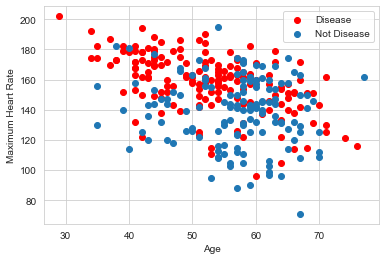

In [598]:
plt.scatter(x=heart.age[heart.target==1], y=heart.thalach[(heart.target==1)], c="red")
plt.scatter(x=heart.age[heart.target==0], y=heart.thalach[(heart.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

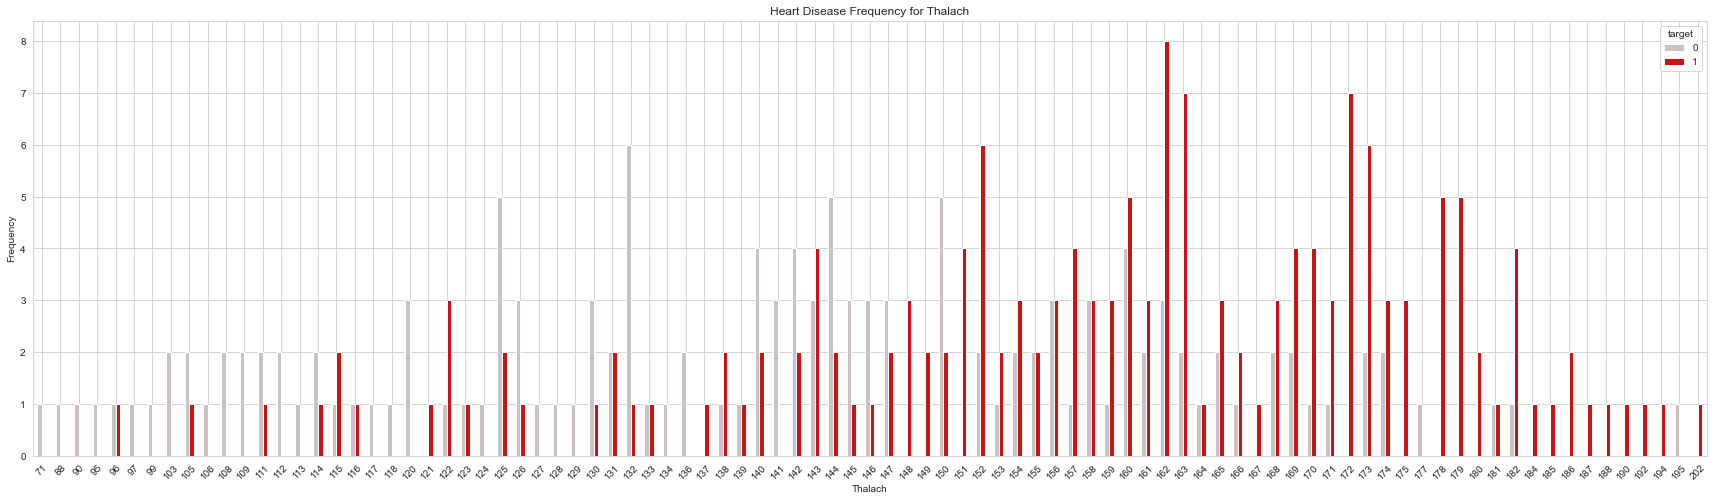

In [599]:
pd.crosstab(heart.thalach,heart.target).plot(kind="bar",figsize=(30,8), color=['#CCC1C3','#CC1313'])
plt.title('Heart Disease Frequency for Thalach')
plt.xlabel('Thalach')
plt.xticks(rotation = 45)
plt.ylabel('Frequency')
plt.show()

## c) Slope Analysis

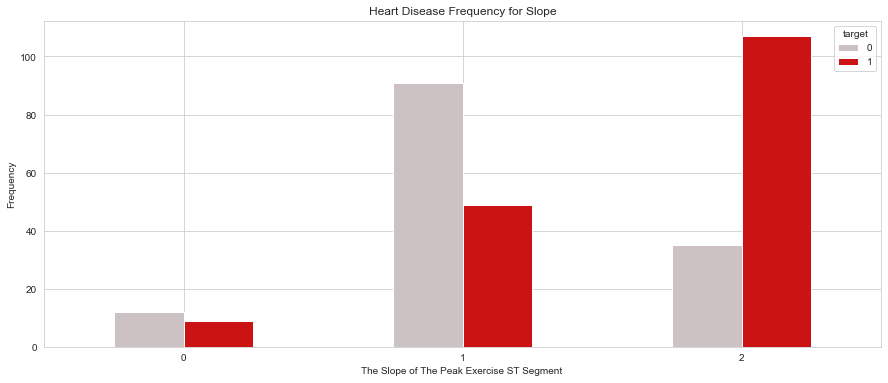

In [600]:
pd.crosstab(heart.slope,heart.target).plot(kind="bar",figsize=(15,6),color=['#CCC1C3','#CC1313'])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

# 1.4.- Main negative correlation attributes - Analysis

## a) Exang Analysis

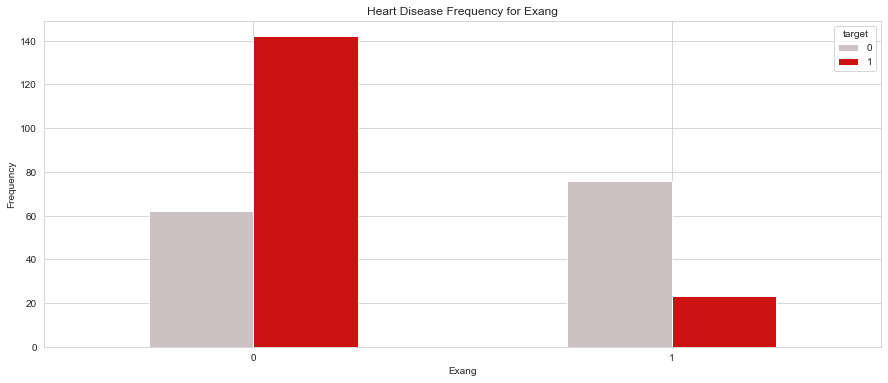

In [601]:
pd.crosstab(heart.exang,heart.target).plot(kind="bar",figsize=(15,6),color=['#CCC1C3','#CC1313'])
plt.title('Heart Disease Frequency for Exang')
plt.xlabel('Exang')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

## b) Oldpeak Analysis

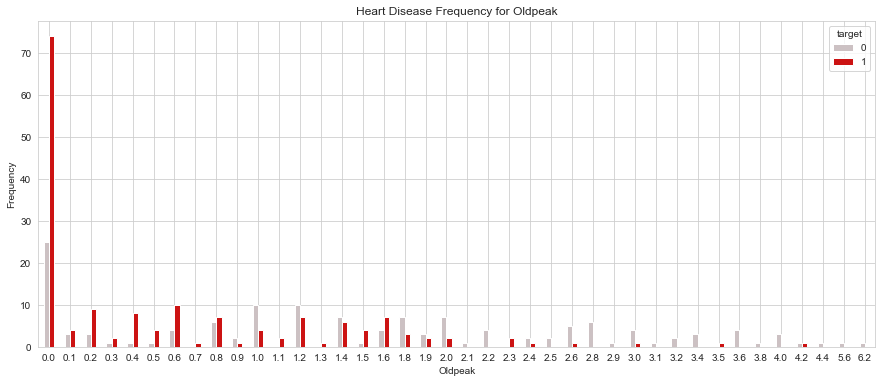

In [602]:
pd.crosstab(heart.oldpeak,heart.target).plot(kind="bar",figsize=(15,6),color=['#CCC1C3','#CC1313'])
plt.title('Heart Disease Frequency for Oldpeak')
plt.xlabel('Oldpeak')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

## c) Ca Analysis

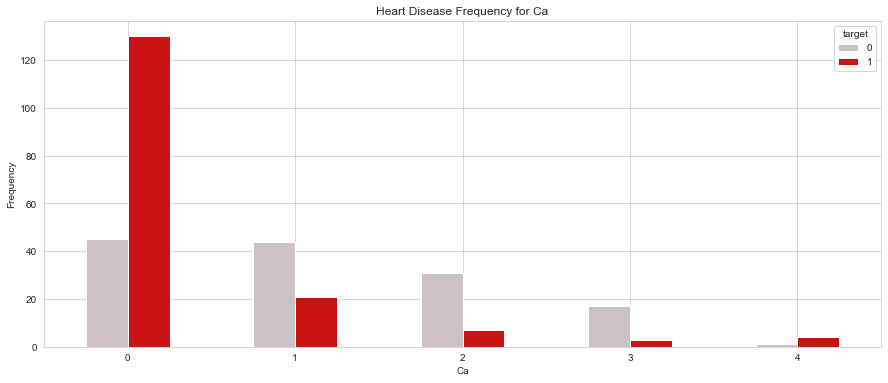

In [603]:
pd.crosstab(heart.ca,heart.target).plot(kind="bar",figsize=(15,6),color=['#CCC1C3','#CC1313'])
plt.title('Heart Disease Frequency for Ca')
plt.xlabel('Ca')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

## d) Thal Analysis
3 = normal; 6 = fixed defect; 7 = reversable defect

In [604]:
heart.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

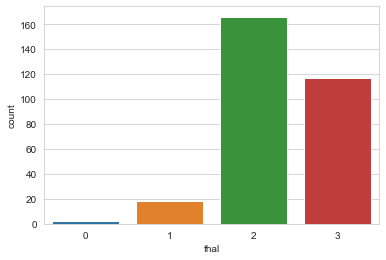

In [605]:
sns.countplot(heart.thal)
plt.show()

In [606]:
#Target 1
a=len(heart[(heart['target']==1)&(heart['thal']==0)])
b=len(heart[(heart['target']==1)&(heart['thal']==1)])
c=len(heart[(heart['target']==1)&(heart['thal']==2)])
d=len(heart[(heart['target']==1)&(heart['thal']==3)])
print('Target 1 Thal 0: ',a)
print('Target 1 Thal 1: ',b)
print('Target 1 Thal 2: ',c)
print('Target 1 Thal 3: ',d)

print('*'*30)

#Target 0
e=len(heart[(heart['target']==0)&(heart['thal']==0)])
f=len(heart[(heart['target']==0)&(heart['thal']==1)])
g=len(heart[(heart['target']==0)&(heart['thal']==2)])
h=len(heart[(heart['target']==0)&(heart['thal']==3)])
print('Target 0 Thal 0: ',e)
print('Target 0 Thal 1: ',f)
print('Target 0 Thal 2: ',g)
print('Target 0 Thal 3: ',h)

Target 1 Thal 0:  1
Target 1 Thal 1:  6
Target 1 Thal 2:  130
Target 1 Thal 3:  28
******************************
Target 0 Thal 0:  1
Target 0 Thal 1:  12
Target 0 Thal 2:  36
Target 0 Thal 3:  89


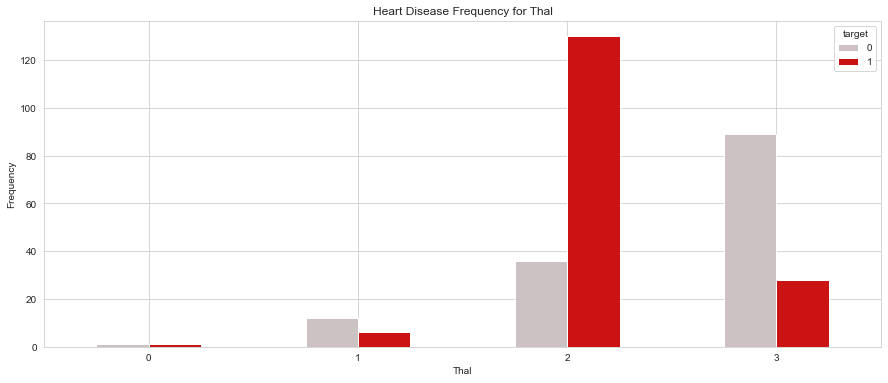

In [607]:
pd.crosstab(heart.thal,heart.target).plot(kind="bar",figsize=(15,6),color=['#CCC1C3','#CC1313'])
plt.title('Heart Disease Frequency for Thal')
plt.xlabel('Thal')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

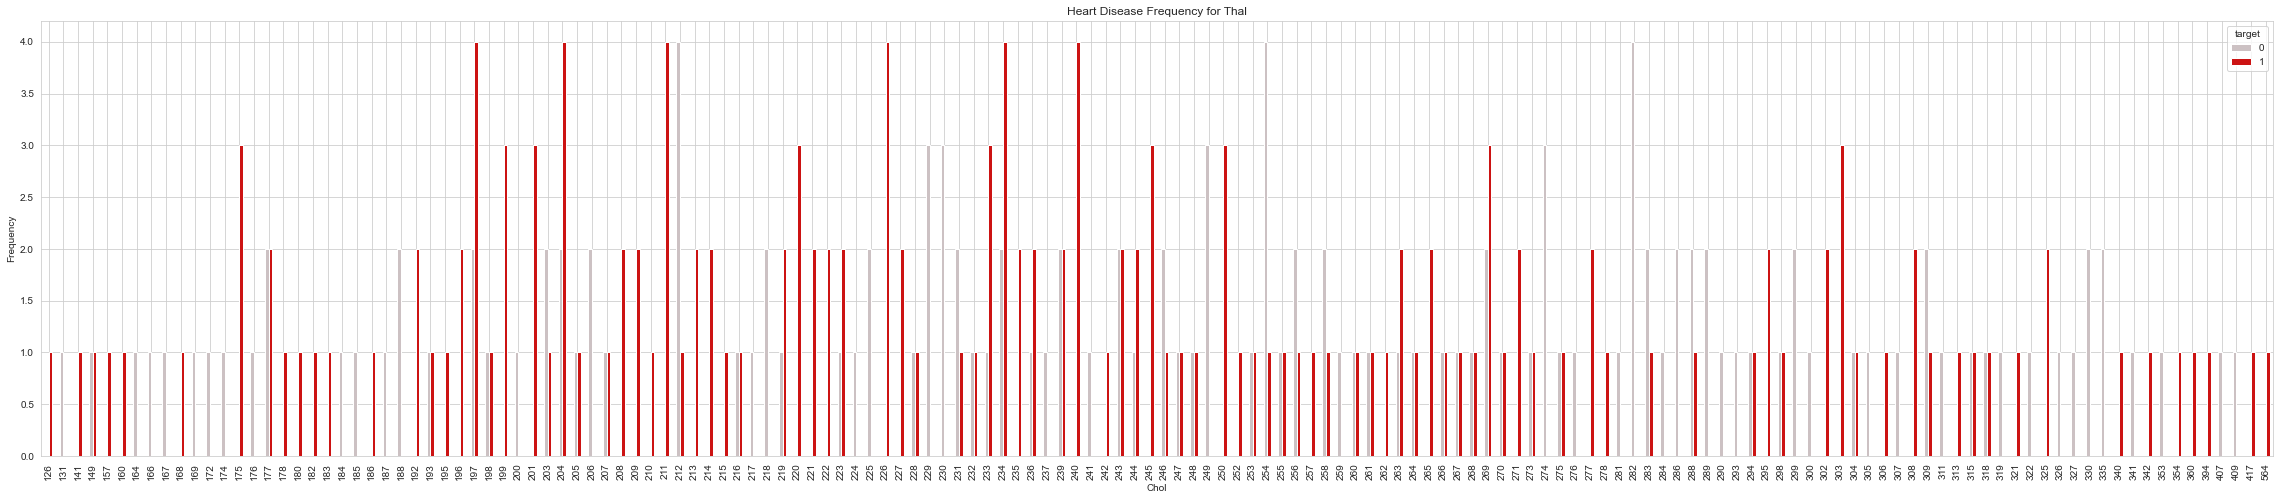

In [608]:
pd.crosstab(heart.chol,heart.target).plot(kind="bar",figsize=(40,8),color=['#CCC1C3','#CC1313'])
sns.set_style('whitegrid')
plt.title('Heart Disease Frequency for Thal')
plt.xlabel('Chol')
plt.xticks(rotation = 90)
plt.ylabel('Frequency')
plt.show()

# 2.- Data Processing

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models. First, I'll use the get_dummies method to create dummy columns for categorical variables.

In [609]:
categorical_val.remove('target')
heart2 = pd.get_dummies(heart, columns = categorical_val)

In [610]:
heart2.head()

,age,trestbps,chol,thalach,oldpeak,target,AgeRange,sex_0,sex_1,cp_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,2,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,1,0,0,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,2,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,2,1,0,1,...,1,1,0,0,0,0,0,0,1,0


In [611]:
print(heart.columns)
print(heart2.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'AgeRange'],
      dtype='object')
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'AgeRange',
       'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1',
       'restecg_0', 'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0',
       'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0',
       'thal_1', 'thal_2', 'thal_3'],
      dtype='object')


In [612]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
heart2[col_to_scale] = s_sc.fit_transform(heart2[col_to_scale])

In [613]:
heart2.head()

,age,trestbps,chol,thalach,oldpeak,target,AgeRange,sex_0,sex_1,cp_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,2,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,1,0,0,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,2,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,2,1,0,1,...,1,1,0,0,0,0,0,0,1,0


# 3.- Machine Learning Model

In [614]:
heart2.head()

,age,trestbps,chol,thalach,oldpeak,target,AgeRange,sex_0,sex_1,cp_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,2,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,1,0,0,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,2,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,2,1,0,1,...,1,1,0,0,0,0,0,0,1,0


## 3.1.- Logistic Regression

In [847]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [848]:
from sklearn.model_selection import train_test_split

X = heart2.drop('target', axis=1)
y = heart2.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [849]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 88.02%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.887755    0.875000  0.880165    0.881378      0.880534
recall       0.828571    0.919708  0.880165    0.874140      0.880165
f1-score     0.857143    0.896797  0.880165    0.876970      0.879592
support    105.000000  137.000000  0.880165  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 87  18]
 [ 11 126]]

Test Result:
Accuracy Score: 86.89%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.931034   0.812500  0.868852   0.871767      0.876625
recall      0.818182   0.928571  0.868852   0.873377      0.868852
f1-score    0.870968   0.866667  0.868852   0.868817      0.868993
support    33.000000  28.000000  0.868852  61.000000     61.000000
________

In [850]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,88.016529,86.885246


## 3.2.- KNN

In [851]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 88.84%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.914894    0.871622   0.88843    0.893258      0.890397
recall       0.819048    0.941606   0.88843    0.880327      0.888430
f1-score     0.864322    0.905263   0.88843    0.884792      0.887499
support    105.000000  137.000000   0.88843  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 86  19]
 [  8 129]]

Test Result:
Accuracy Score: 85.25%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.928571   0.787879  0.852459   0.858225      0.863991
recall      0.787879   0.928571  0.852459   0.858225      0.852459
f1-score    0.852459   0.852459  0.852459   0.852459      0.852459
support    33.000000  28.000000  0.852459  61.000000     61.000000
________

In [852]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,88.016529,86.885246
1,K-nearest neighbors,88.842975,85.245902


## 3.3.- Support Vector machine

In [853]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 93.39%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.958763    0.917241  0.933884    0.938002      0.935257
recall       0.885714    0.970803  0.933884    0.928259      0.933884
f1-score     0.920792    0.943262  0.933884    0.932027      0.933513
support    105.000000  137.000000  0.933884  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 93  12]
 [  4 133]]

Test Result:
Accuracy Score: 81.97%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.892857   0.757576  0.819672   0.825216      0.830761
recall      0.757576   0.892857  0.819672   0.825216      0.819672
f1-score    0.819672   0.819672  0.819672   0.819672      0.819672
support    33.000000  28.000000  0.819672  61.000000     61.000000
________

In [854]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,88.016529,86.885246
1,K-nearest neighbors,88.842975,85.245902
2,Support Vector Machine,93.388430,81.967213


## 3.4.- Decision Tree Classifier

In [855]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=100)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    105.0  137.0       1.0      242.0         242.0
_______________________________________________
Confusion Matrix: 
 [[105   0]
 [  0 137]]

Test Result:
Accuracy Score: 75.41%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.821429   0.696970  0.754098   0.759199      0.764300
recall      0.696970   0.821429  0.754098   0.759199      0.754098
f1-score    0.754098   0.754098  0.754098   0.754098      0.754098
support    33.000000  28.000000  0.754098  61.000000     61.000000
_______________________________________________
Confusion Matr

In [856]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,88.016529,86.885246
1,K-nearest neighbors,88.842975,85.245902
2,Support Vector Machine,93.388430,81.967213
3,Decision Tree Classifier,100.000000,75.409836


## 3.5.- Random Forest Classifier

In [893]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=100)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    105.0  137.0       1.0      242.0         242.0
_______________________________________________
Confusion Matrix: 
 [[105   0]
 [  0 137]]

Test Result:
Accuracy Score: 88.52%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.933333   0.838710  0.885246   0.886022      0.889900
recall      0.848485   0.928571  0.885246   0.888528      0.885246
f1-score    0.888889   0.881356  0.885246   0.885122      0.885431
support    33.000000  28.000000  0.885246  61.000000     61.000000
_______________________________________________
Confusion Matr

In [894]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,88.016529,86.885246
1,K-nearest neighbors,88.842975,85.245902
2,Support Vector Machine,93.388430,81.967213
3,Decision Tree Classifier,100.000000,75.409836
4,Random Forest Classifier,100.000000,88.524590
5,Random Forest Classifier,100.000000,88.524590


## 3.6.- Applying GridSearch to previous models.

In [876]:
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5, iid=True)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best parameters: {'C': 0.08858667904100823, 'solver': 'liblinear'}
Train Result:
Accuracy Score: 87.19%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.870000    0.873239  0.871901    0.871620      0.871834
recall       0.828571    0.905109  0.871901    0.866840      0.871901
f1-score     0.848780    0.888889  0.871901    0.868835      0.871486
support    105.000000  137.000000  0.871901  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 87  18]
 [ 13 124]]

Test Result:
Accuracy Score: 86.89%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.931034   0.812500  0.868852   0.871767      0.876625
recall      0.818182   0.928571  0.868852   0.873377      0.868852
f1-score    0.870968   0.866667  0.868852   0.868817      0.868993
support 

[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.6s finished


In [877]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,87.190083,86.885246


In [878]:
train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))
#     test_score.append(accuracy_score(y_test, model.predict(X_test)))

knn_clf = KNeighborsClassifier(n_neighbors=22)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 83.88%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.836735    0.840278  0.838843    0.838506      0.838740
recall       0.780952    0.883212  0.838843    0.832082      0.838843
f1-score     0.807882    0.861210  0.838843    0.834546      0.838072
support    105.000000  137.000000  0.838843  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 82  23]
 [ 16 121]]

Test Result:
Accuracy Score: 86.89%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.931034   0.812500  0.868852   0.871767      0.876625
recall      0.818182   0.928571  0.868852   0.873377      0.868852
f1-score    0.870968   0.866667  0.868852   0.868817      0.868993
support    33.000000  28.000000  0.868852  61.000000     61.000000
________

In [879]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,87.190083,86.885246
1,Tuned K-nearest neighbors,83.884298,86.885246


In [880]:
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")
svm_cv.fit(X_train, y_train)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 147 candidates, totalling 735 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.2s


Best params: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Train Result:
Accuracy Score: 87.19%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.885417    0.863014  0.871901    0.874215      0.872734
recall       0.809524    0.919708  0.871901    0.864616      0.871901
f1-score     0.845771    0.890459  0.871901    0.868115      0.871070
support    105.000000  137.000000  0.871901  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 85  20]
 [ 11 126]]

Test Result:
Accuracy Score: 83.61%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.925926   0.764706  0.836066   0.845316      0.851923
recall      0.757576   0.928571  0.836066   0.843074      0.836066
f1-score    0.833333   0.838710  0.836066   0.836022      0.835801
support    33.00000

[Parallel(n_jobs=-1)]: Done 735 out of 735 | elapsed:    3.3s finished


In [881]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,87.190083,86.885246
1,Tuned K-nearest neighbors,83.884298,86.885246
2,Tuned Support Vector Machine,87.190083,83.606557


In [882]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=100)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3, iid=True)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 2680 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 6680 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 12280 tasks      | elapsed:   36.2s


Best_params: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 7, 'min_samples_split': 2, 'splitter': 'random'}
Train Result:
Accuracy Score: 84.71%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.854167    0.842466  0.847107    0.848316      0.847543
recall       0.780952    0.897810  0.847107    0.839381      0.847107
f1-score     0.815920    0.869258  0.847107    0.842589      0.846116
support    105.000000  137.000000  0.847107  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 82  23]
 [ 14 123]]

Test Result:
Accuracy Score: 88.52%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.964286   0.818182  0.885246   0.891234      0.897222
recall      0.818182   0.964286  0.885246   0.891234      0.885246
f1-score    0.885246  

[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:   38.2s finished


In [883]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,87.190083,86.885246
1,Tuned K-nearest neighbors,83.884298,86.885246
2,Tuned Support Vector Machine,87.190083,83.606557
3,Tuned Decision Tree Classifier,84.710744,88.524590


## 4.- Attribute importance

In [886]:
heart2.head()

,age,trestbps,chol,thalach,oldpeak,target,AgeRange,sex_0,sex_1,cp_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,2,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,1,0,0,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,2,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,2,1,0,1,...,1,1,0,0,0,0,0,0,1,0


In [895]:
def feature_imp(heart2, model):
    fi = pd.DataFrame()
    fi["feature"] = heart2.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance")

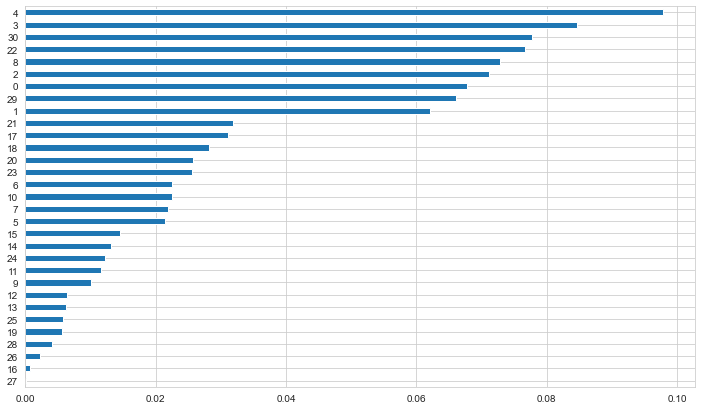

In [896]:
feature_imp(X, rf_clf).plot(kind='barh', figsize=(12,7), legend=False)

In [500]:
heart2.iloc[:,4]

0      1.087338
1      2.122573
2      0.310912
3     -0.206705
4     -0.379244
         ...   
298   -0.724323
299    0.138373
300    2.036303
301    0.138373
302   -0.896862
Name: oldpeak, Length: 303, dtype: float64

In [897]:
heart2.iloc[:,3]

0      0.015443
1      1.633471
2      0.977514
3      1.239897
4      0.583939
         ...   
298   -1.165281
299   -0.771706
300   -0.378132
301   -1.515125
302    1.064975
Name: thalach, Length: 303, dtype: float64

In [898]:
heart2.iloc[:,30]

0      0
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    1
Name: thal_2, Length: 303, dtype: uint8

In [899]:
heart2.iloc[:,22]

0      0
1      0
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: slope_2, Length: 303, dtype: uint8

In [900]:
heart2.iloc[:,8]

0      1
1      1
2      0
3      1
4      0
      ..
298    0
299    1
300    1
301    1
302    0
Name: sex_1, Length: 303, dtype: uint8

In [506]:
heart2.iloc[:,8]

0      1
1      1
2      0
3      1
4      0
      ..
298    0
299    1
300    1
301    1
302    0
Name: sex_1, Length: 303, dtype: uint8

In [507]:
heart2.iloc[:,2]

0     -0.256334
1      0.072199
2     -0.816773
3     -0.198357
4      2.082050
         ...   
298   -0.101730
299    0.342756
300   -1.029353
301   -2.227533
302   -0.198357
Name: chol, Length: 303, dtype: float64

In [901]:
heart2.iloc[:,0]

0      0.952197
1     -1.915313
2     -1.474158
3      0.180175
4      0.290464
         ...   
298    0.290464
299   -1.033002
300    1.503641
301    0.290464
302    0.290464
Name: age, Length: 303, dtype: float64

In [902]:
heart2.iloc[:,29]

0      1
1      0
2      0
3      0
4      0
      ..
298    0
299    0
300    0
301    0
302    0
Name: thal_1, Length: 303, dtype: uint8

In [903]:
heart2.iloc[:,1]

0      0.763956
1     -0.092738
2     -0.092738
3     -0.663867
4     -0.663867
         ...   
298    0.478391
299   -1.234996
300    0.706843
301   -0.092738
302   -0.092738
Name: trestbps, Length: 303, dtype: float64